# Explore a shared dataset and download selected files from DAT CORE
## SPARC data meeting
### December 5, 2018
### by: Max Novelli (man8@pitt.edu) RNEL, University of Pittsburgh

First we set up our environment:
- load all the python libraries that we need,   
    including the DAT CORE (Blackfynn) one
- load our library notebook
- instantiate the DAT CORE and retrieve the shared dataset
- create a local folder where we can save the files that we download

Import all the libraries that we need

In [1]:
import os
from blackfynn import Blackfynn
from blackfynn.models import Collection,DataPackage
import pprint
pp = pprint.PrettyPrinter()
from IPython.display import Image

load our jupyter notebook library

In [2]:
%run SPARC_201812_library.ipynb

In [3]:
DATCORE_DATASET, DOWNLOAD_PATH

('SPARC December 2018 Presentation',
 '/home/nitrosx/Documents/RNEL/Presentations/SPARC.20181205/notebooks/../SPARC_dataset_download')

Let's make sure that the download folder exists

In [4]:
createDirIfNeeded(DOWNLOAD_PATH)

True

Let's instantiate the DAT CORE environment and retrieve the shared dataset

In [5]:
dcInstance = Blackfynn()

List all the dataset on DAT CORE

In [6]:
[ds.name for ds in dcInstance.datasets()]

['Demo Dataset',
 'Test Upload - Lee',
 'Test1',
 'SPARC December 2018',
 'SPARC December 2018 Presentation']

We are looking for the following dataset

In [7]:
DATCORE_DATASET,DOWNLOAD_PATH

('SPARC December 2018 Presentation',
 '/home/nitrosx/Documents/RNEL/Presentations/SPARC.20181205/notebooks/../SPARC_dataset_download')

In [8]:
dcDataset = dcInstance.get_dataset(DATCORE_DATASET)
dcDataset

<Dataset name='SPARC December 2018 Presentation' id='N:dataset:586237f2-46c6-47a1-ada4-ae06ca62e6e2'>

Now we know that we have access to the SPARC test dataset.  
Let's explore it

In [9]:
prettyShowDatCoreDatasetFiles(dcDataset)

--------------------------------------------
DAT CORE
Dataset : SPARC December 2018 Presentation
Collections(Folders) and DataPackages(Files)
--------------------------------------------
    DataPackage = dataset.json
        File       = dataset (dataset.json)
    Collection = subject_1
        DataPackage = subject1.jpeg
            File       = subject1 (subject1.jpg)
        DataPackage = subject1.json
            File       = subject1 (subject1.json)
        DataPackage = subject1.bfts
            File       = subject1 (subject1.bfts)
        DataPackage = subject1.csv
            File       = subject1 (subject1.csv)
    Collection = subject_2
        DataPackage = subject2.json
            File       = subject2 (subject2.json)
        DataPackage = subject2.jpeg
            File       = subject2 (subject2.jpg)
        DataPackage = subject2.bfts
            File       = subject2 (subject2.bfts)
        DataPackage = subject2.csv
            File       = subject2 (subject2.csv)
  

We discovered that there are many pretty files in the shared data set

We brainstorm with our team and we want to download locally all the json files,  
and the btfs file for subject one so we can verify the format.  

The files that we are interested are:
- subject_1/subject1.json
- subject_1/subject1.bfts
- subject_2/subject2.json
- subject_3/subject3.json

#### Let's start with file subject1/subject1.json

First we need to retrieve the collection where the files is located:

In [10]:
dcSubject1Collection = dcDataset.get_items_by_name('subject_1')[0]
dcSubject1Collection

<Collection name='subject_1' id='N:collection:5667a14f-8e89-4436-8d51-c5ce955d77c0'>

Than check all the items in the **collection/folder**,  
when we find the data package that contains the file,  
we save the handle to the file object

In [11]:
selectedFile = None
# loops through the items in this collection
for item in dcSubject1Collection.items:
    # for each item, we loop through the files
    for file in item.files:
        if file.name == 'subject1' and file.type.lower() == 'json':
            selectedFile= file
selectedFile

<File name='subject1' type='Json' key='man8@pitt.edu/data/3aa80ce3-a5f9-4856-8f8d-1357f167521f/subject1.json' bucket='prod-storage-blackfynn' size='698' id='41409'>

We need to define the local file name, which should be subject1.json

In [12]:
filePath = os.path.join(DOWNLOAD_PATH,'subject1.json')
filePath

'/home/nitrosx/Documents/RNEL/Presentations/SPARC.20181205/notebooks/../SPARC_dataset_download/subject1.json'

... and we download it

In [13]:
selectedFile.download(filePath)

'/home/nitrosx/Documents/RNEL/Presentations/SPARC.20181205/notebooks/../SPARC_dataset_download/subject1.json'

...and we repeat the same procedure for the other 3 files:
- subject_1/subject1.bfts
- subject_2/subject2.json
- subject_3/subject3.json

Let's define a function that performs that for us...

In [14]:
def downloadFileFromDatCore(dcDataset,datcoreFilePath,localFileName):
    # extract the collections to traverse and the file name
    fileName = datcoreFilePath.split('/')[-1]
    collections = datcoreFilePath.split('/')[0:-1]
    # find the collection object that contains our file
    hC = dcDataset
    for index in range(len(collections)):
        temp = hC.get_items_by_name(collections[index])
        if not temp:
            return False
        hC = temp[0]
    # now finds the data package and the file
    selectedFile = None
    for item in hC.items:
        for file in item.files:
            if file.s3_key.split('/')[-1] == fileName:
                selectedFile= file
    if not selectedFile:
        return False
    selectedFile.download(localFileName)
    return True

In [15]:
downloadFileFromDatCore(
    dcDataset,
    'subject_1/subject1.bfts',
    os.path.join(DOWNLOAD_PATH,'subject1.bfts'))

True

In [16]:
downloadFileFromDatCore(
    dcDataset,
    'subject_2/subject2.json',
    os.path.join(DOWNLOAD_PATH,'subject2.json'))

True

In [17]:
downloadFileFromDatCore(
    dcDataset,
    'subject_3/subject3.json',
    os.path.join(DOWNLOAD_PATH,'subject3.json'))

True

Let's verify that we have the four selected files in the local download folder:

In [18]:
prettyShowFolderTree(DOWNLOAD_PATH)

SPARC_dataset_download/
    subject3.json
    subject1.bfts
    subject1.json
    subject2.json


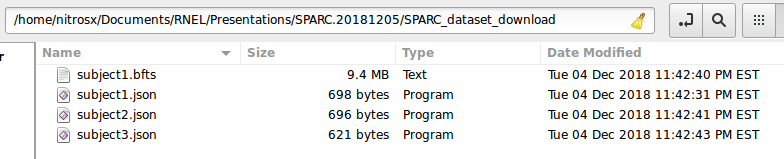

In [19]:
Image(filename='../images/files_downloaded.png')

## Congratulation!!! 
### you just downloaded your files from a shared dataset on DAT CORE!!!

## Thank you.
If you have any question, please come and find me during breaks.  
This notebook will be available to you through the SPARC material.  
Max Novelli (man8@pitt)